# **An analysis and forecasting  of the air pollution levels in India**

In this project we will take a look at 24 Indian cities air pollution levels over the years as well as forecast the air pollution levels for the next 1 year at the current rate of pollution for the entire country. We will also try to explain the trends, seasonality etc. from the data given.
We will be using AQI - Air quality Index, as our measure for the air pollution levels.

The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/ .



There will be two main parts to the project:

1. To compare the various states on the level of pollution for the year 2019.

2. To find trends, seasonality etc for the pollution levels of India as a whole as well as Delhi and forecast it to the future.

## A brief introduction to the calculation of AQI

<img style="float: center;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR8MwkjROMGpNIVRTeKgO_vIj2QU-J9MAIW8v6wf6yg6mWvPPWH&usqp=CAU.jpg">

1. The AQI calculation uses 7 measures: PM2.5(Particulate Matter 2.5-micrometer), PM10, SO2, NOx, NH3, CO and O3(ozone).

2. For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

3. For CO and O3 the maximum value in last 8-hrs is used.

4. Each measure is converted into a Sub-Index based on pre-defined groups.

5. Sometimes measures are not available due to lack of measuring or lack of required data points.

6. Final AQI is the maximum Sub-Index with the condition that at least one of PM2 and PM10 should be available and at least three out of the seven should be available.

### How is AQI calculated?
1. The Sub-indices for individual pollutants at a monitoring location are calculated using its
24-hourly average concentration value (8-hourly in case of CO and O3) and health
breakpoint concentration range. The worst sub-index is the AQI for that location.
2. All the eight pollutants may not be monitored at all the locations. Overall AQI is
calculated only if data are available for minimum three pollutants out of which one should
necessarily be either PM2.5 or PM10. Else, data are considered insufficient for calculating
AQI. Similarly, a minimum of 16 hours’ data is considered necessary for calculating subindex.
3. The sub-indices for monitored pollutants are calculated and disseminated, even if data are
inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air
quality status for that pollutant.
4. The web-based system is designed to provide AQI on real time basis. It is an automated
system that captures data from continuous monitoring stations without human
intervention, and displays AQI based on running average values (e.g. AQI at 6am on a
day will incorporate data from 6am on previous day to the current day).
5. For manual monitoring stations, an AQI calculator is developed wherein data can be fed
manually to get AQI value. 

Let us take a look at the ranges of AQI.

<img src="https://i.imgur.com/XmnE0rT.png" alt="">

Now we can proceed with our analysis.

## Downloading the dataset and importing libraries to conduct analysis:


In [1]:
# Importing necessary libraries to conduct our analysis


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")



In [2]:
#Reading the dataset into object 'df' using pandas:
import datetime
df= pd.read_csv('city_day.csv',parse_dates=True)

for i in range(29531):
    df['Date'][i] = datetime.datetime.strptime(df['Date'][i], "%Y-%m-%d").strftime("%Y-%m-%d")

df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# df.drop(df[df['City'] =='Portland'].index, inplace = True)

## Exploratory data analysis(EDA),Data Wrangling and Pre-processing:
First, let us take a look at the first five rows of our dataset.

In [4]:
df.shape

(29531, 16)

In [5]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Right off we can notice there are many missing values which can lead to incorrect predictions and inference.

Taking a deeper look we notice that only the Delhi dataset is complete for the AQI column with the rest of the cities with incomplete data. This is unfortunately unrectifiable as official records of pollutant levels are only available as given above leaving a large amount of data missing.

Next let us take a look at a summary of all the data:

In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Above is a summary statistics of all the columns. The AQI as explained above is based on these columns and for our notebook we will only deal with AQI values across the states.




#### Removing unused columns:
Here we will keep the columns 'City', 'Date', 'AQI' and 'AQI_Bucket'.



In [7]:
df=df[['City','Date','AQI']]

#### Modifying dataset for our needs:
Here,we will tranform the data with the columns as the cities AQI so as to compare AQI between states. The table after transforming is given below.

In [8]:
cities=pd.unique(df['City'])
column1= cities+'AQI'
# column2=cities+'_O3'
# columns=[*column1,*column2]

In [9]:
len(column1)

26

In [10]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'),columns=column1)

print(final_df.shape)

(2009, 26)


In [11]:
arr=dict()
for i in range(len(cities)):
    arr[cities[i]] = 0
    

for i in range(len(cities)):
    for j in range(29531):
        if(cities[i]==df['City'][j]):
            arr[cities[i]]+=1
            
            
print(arr)

{'Ahmedabad': 2009, 'Aizawl': 113, 'Amaravati': 951, 'Amritsar': 1221, 'Bengaluru': 2009, 'Bhopal': 289, 'Brajrajnagar': 938, 'Chandigarh': 304, 'Chennai': 2009, 'Coimbatore': 386, 'Delhi': 2009, 'Ernakulam': 162, 'Gurugram': 1679, 'Guwahati': 502, 'Hyderabad': 2006, 'Jaipur': 1114, 'Jorapokhar': 1169, 'Kochi': 162, 'Kolkata': 814, 'Lucknow': 2009, 'Mumbai': 2009, 'Patna': 1858, 'Shillong': 310, 'Talcher': 925, 'Thiruvananthapuram': 1112, 'Visakhapatnam': 1462}


In [12]:
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
#     print(n)
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

Notice that the data is daily data. We will convert it into monthly data for our ease by averaging a months data.

In [13]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [14]:
final_df.tail()

,AhmedabadAQI,AizawlAQI,AmaravatiAQI,AmritsarAQI,BengaluruAQI,BhopalAQI,BrajrajnagarAQI,ChandigarhAQI,ChennaiAQI,CoimbatoreAQI,...,JorapokharAQI,KochiAQI,KolkataAQI,LucknowAQI,MumbaiAQI,PatnaAQI,ShillongAQI,TalcherAQI,ThiruvananthapuramAQI,VisakhapatnamAQI
2020-03-01,277.466667,65.350000,52.548387,83.733333,90.741935,109.714286,124.100000,55.419355,70.290323,78.272727,...,163.166667,129.166667,122.838710,134.000000,104.645161,158.419355,67.870968,117.250000,74.741935,85.100000
2020-04-01,120.733333,39.233333,44.400000,58.708333,68.533333,113.782609,137.923077,44.586207,63.500000,84.823529,...,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,75.750000,132.137931,57.066667,54.321429
2020-05-01,128.677419,24.193548,59.096774,77.677419,73.161290,104.451613,129.133333,74.129032,78.677419,57.931034,...,135.580645,84.724138,53.161290,119.096774,63.935484,138.516129,32.451613,101.333333,55.967742,64.903226
2020-06-01,97.357143,20.862069,47.866667,101.533333,55.166667,71.666667,117.333333,66.500000,103.066667,38.366667,...,136.533333,93.866667,46.466667,96.500000,53.300000,82.366667,32.678571,81.055556,45.400000,82.200000
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,NaN,66.000000,92.000000,NaN,...,86.000000,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000


Next, we will add a column 'India_AQI' which gives us the average of all the cities data across a row. Note that this is not necessarily an accurate measure of AQI for India as a whole as only a small subset of all the cities are being used. Nevertheless,we can consider this as a reasonably representative measure of the AQI.

In [15]:
final_df['US_AQI']=final_df.mean(axis=1)

Let us take a quick look at the graph of India's AQI over the years.

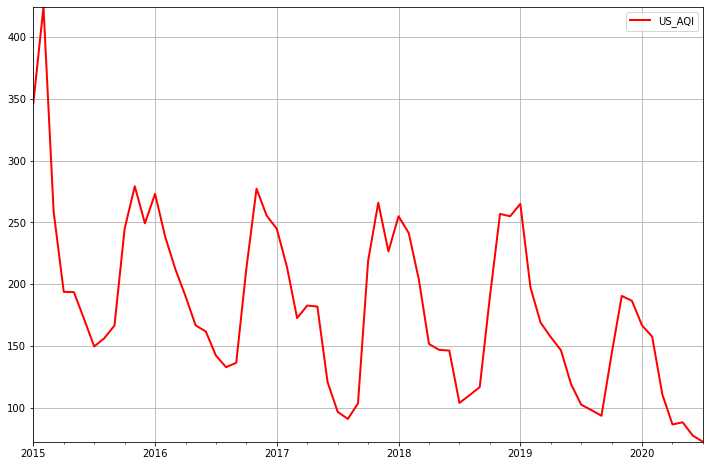

In [16]:
ax=final_df[['US_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

Straight away we can see patterns and trends over the years. There are two highly noticeable patterns. One is the general trend downwards. Over the past 5 years we can see the AQI reducing marginally. Note that this can be  a litte misleading, especially due to the 2015 data, as the dataset in the first few observations  only comprises of Delhi and Ahmedabad during which have relatively highly pollution compared to the rest of the cities which makes the initial portion of the graph highly exaggerated. Nevertheless we can see a general decline in pollution over the years. 

The next pattern thats easily observable is the seasonal component which plays a big role in the pollution of the country. We will discuss further  in the 2nd part of our project.
One other important point to note is the affect of COVID-19 on India's pollution level. The pollution levels are drastically lower during the year 2020 for the same reason.

We can move on to comparing the AQI of the cities to find the most polluted city and the least.
Note that we will be leaving the unavailable data as is and further modify if required.

## Air pollution by city for the year 2019
Our aim of the section is to find level of pollution in the cities and compare them, we use the year 2019 as it is by far the most complete in terms of data and it is the most recent full year and hence rather apt to compare.

We will start with forming a table with the data from 2019.

In [17]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadAQI,AizawlAQI,AmaravatiAQI,AmritsarAQI,BengaluruAQI,BhopalAQI,BrajrajnagarAQI,ChandigarhAQI,ChennaiAQI,CoimbatoreAQI,...,KochiAQI,KolkataAQI,LucknowAQI,MumbaiAQI,PatnaAQI,ShillongAQI,TalcherAQI,ThiruvananthapuramAQI,VisakhapatnamAQI,US_AQI
2019-01-01,755.516129,NaN,218.612903,94.633333,116.806452,NaN,259.967742,NaN,131.000000,NaN,...,NaN,360.838710,315.516129,165.516129,405.290323,NaN,289.400000,128.161290,263.129032,264.985723
2019-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,208.259259,NaN,118.071429,NaN,...,NaN,266.071429,243.071429,149.821429,296.107143,NaN,322.555556,88.428571,152.307692,197.428013
2019-03-01,601.741935,NaN,79.967742,99.733333,122.129032,NaN,186.870968,NaN,101.419355,NaN,...,NaN,157.774194,217.645161,123.483871,214.032258,NaN,189.888889,88.838710,93.033333,168.896689
2019-04-01,633.518519,NaN,78.133333,112.000000,124.300000,NaN,190.562500,NaN,87.533333,NaN,...,NaN,86.800000,217.700000,98.066667,151.100000,NaN,142.160000,69.933333,92.827586,157.218977
2019-05-01,412.769231,NaN,106.777778,113.258065,105.387097,NaN,130.464286,NaN,103.612903,NaN,...,NaN,88.548387,184.096774,87.870968,170.806452,NaN,130.413793,75.419355,123.933333,146.614816


We can see that there seems to be still quite a few missing values. Let us take a look at the missing data.

In [18]:
df_2019.isna().sum()

AhmedabadAQI              0
AizawlAQI                13
AmaravatiAQI              1
AmritsarAQI               0
BengaluruAQI              0
BhopalAQI                 8
BrajrajnagarAQI           0
ChandigarhAQI             8
ChennaiAQI                0
CoimbatoreAQI             5
DelhiAQI                  0
ErnakulamAQI             12
GurugramAQI               0
GuwahatiAQI               1
HyderabadAQI              0
JaipurAQI                 0
JorapokharAQI             1
KochiAQI                 12
KolkataAQI                0
LucknowAQI                0
MumbaiAQI                 0
PatnaAQI                  0
ShillongAQI               8
TalcherAQI                0
ThiruvananthapuramAQI     0
VisakhapatnamAQI          0
US_AQI                    0
dtype: int64

We can see that there are 3 cities whose data is missing in its entirety. We will remove these columns as they serve no purpose. There are few other columns with a few missing months of data. For our analysis we will keep them even though it might add to the inacuracy of our results.

In [19]:
df_2019=df_2019.drop(['AizawlAQI','AmaravatiAQI','BhopalAQI','ChandigarhAQI','CoimbatoreAQI','ErnakulamAQI','GuwahatiAQI','JorapokharAQI','KochiAQI','ShillongAQI'],axis=1)

We will take the average of all the months for each city to find the AQI for the year 2019.

In [20]:
AQI_2019=df_2019.mean(axis=0)
AQI_2019.head()

AhmedabadAQI       498.673857
AmritsarAQI        108.971576
BengaluruAQI        91.991935
BrajrajnagarAQI    148.056790
ChennaiAQI         101.903261
dtype: float64

Before looking at the means of the AQI values of the cities, we will take a look at the boxplots of the AQI values of the various cities.

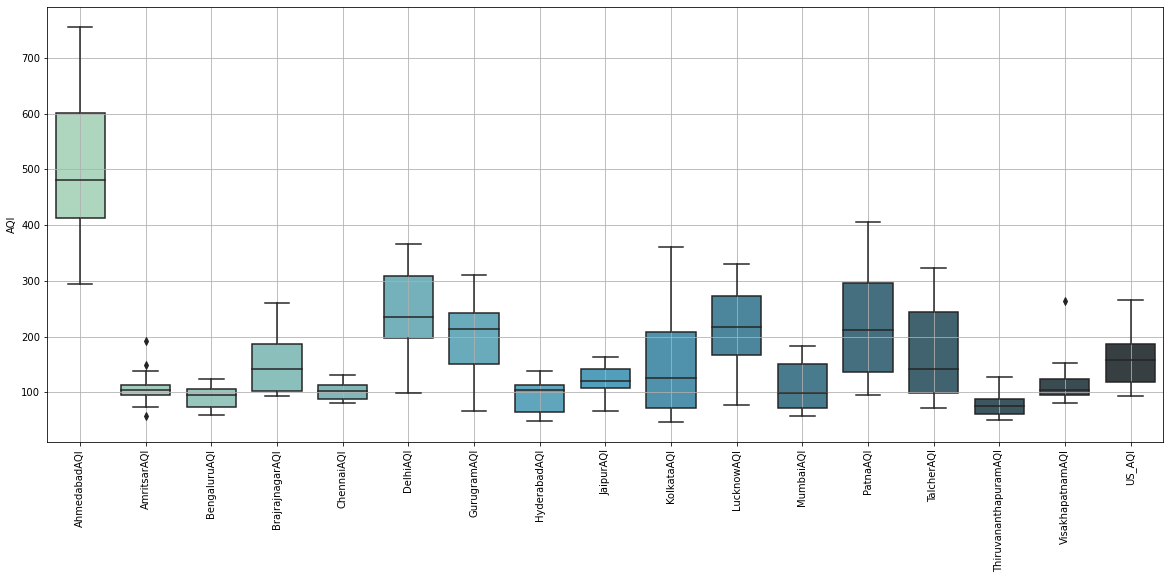

In [21]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

We can see that Ahmedebad has easily the highest values of AQI in the country, followed by Delhi lagging far behind. Let us take a look at the means of the values of AQI for further comparison.

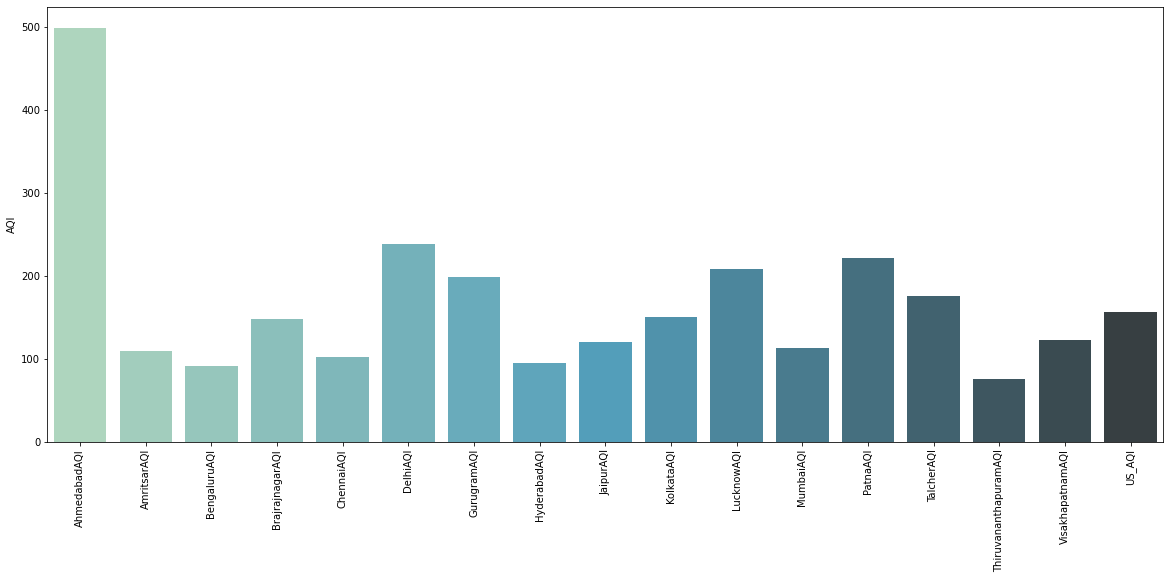

In [22]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.ylabel('AQI')
bplot=sns.barplot(AQI_2019.index, AQI_2019.values,palette="GnBu_d")


In [23]:
final_df.head()

,AhmedabadAQI,AizawlAQI,AmaravatiAQI,AmritsarAQI,BengaluruAQI,BhopalAQI,BrajrajnagarAQI,ChandigarhAQI,ChennaiAQI,CoimbatoreAQI,...,KochiAQI,KolkataAQI,LucknowAQI,MumbaiAQI,PatnaAQI,ShillongAQI,TalcherAQI,ThiruvananthapuramAQI,VisakhapatnamAQI,US_AQI
2015-01-01,350.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.311828
2015-02-01,520.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.284286
2015-03-01,418.571429,NaN,NaN,NaN,130.545455,NaN,NaN,NaN,363.800000,NaN,...,NaN,NaN,264.272727,NaN,NaN,NaN,NaN,NaN,NaN,258.875688
2015-04-01,308.640000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,175.862069,NaN,...,NaN,NaN,118.586207,NaN,NaN,NaN,NaN,NaN,NaN,193.815995
2015-05-01,263.466667,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,193.556272


We can see that Ahmedabad and Delhi are the most polluted whereas Shillong is the least followed by trivandrum. With this we end the comparison and move to the next section of forecasting the values of future AQI for the whole of India.

## Analysing and forecasting of AQI values:
We will first take a look at the seasonal decompose of the AQI values of india.

2015-01-01    346.311828
2015-02-01    424.284286
2015-03-01    258.875688
2015-04-01    193.815995
2015-05-01    193.556272
                 ...    
2020-03-01    110.777963
2020-04-01     86.532043
2020-05-01     88.262751
2020-06-01     77.532108
2020-07-01     72.500000
Freq: MS, Name: US_AQI, Length: 67, dtype: float64


AttributeError: 'DecomposeResult' object has no attribute 'show'

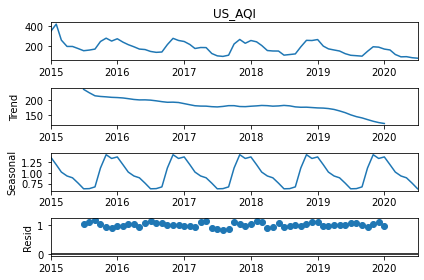

In [24]:

from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['US_AQI']

print(India_AQI)
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot();
result.show()

In [ ]:
type(India_AQI)

As we have discussed earlier ,there is a very clear seasonality, and  a less clearer trend. The trend is possibly  due to increasing restrictions on pollution by the govt and the last surge downward is clearly due to the recent Covid-19. 

How about the seasonality, what causes the increase during certian months and a decline in others? Let us take a closer look during which months the pollution peaks.

In [ ]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2019-01-01','2020-01-01'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

We can see that there are two peaks largely, one during October and the during January. And the lowest amount of pollution is around july-September after which there is a sharp increase. 
Similarly, there is a decrease from January to July. This spike in the winters is due to a combination of factors. One point of note is that North Indian states have a higher increase of pollution.

The spike is due to factors including Winter aversion(explained after),valley affect(explained after), seasonal factors such as dust storms,  crop fires, burning of solid fuels for heating, and firecracker-related pollution during Diwali, stubble burning etc.


### Winter Aversion:
In summer, air in the planetary boundary layer (the lowest part of the atmosphere) is warmer and lighter, and rises upwards more easily. This carries pollutants away from the ground and mixes them with cleaner air in the upper layers of the atmosphere in a process called ‘vertical mixing’.  

During winters the planetary boundary layer is thinner as the cooler air near the earth’s surface is dense. The cooler air is trapped under the warm air above that forms a kind of atmospheric ‘lid’. This phenomenon is called winter inversion. Since the vertical mixing of air happens only within this layer, the pollutants released lack enough space to disperse in the atmosphere.
During summers, pollution levels decrease as the warmer air rises up freely, making the boundary layer thicker, and providing enough space for pollutants to disperse. The same thing happens during winter afternoons, when increased heat brings down pollution slightly.

The effects of inversion are stronger at night, which is why air quality levels drop overnight. This is also why experts ask people to refrain from early morning walks, as they could be exposed to much higher pollution levels at that time.
In cities closer to the coast, like Mumbai, the sea breeze and moisture help disperse pollution. However, the Indo-Gangetic plain, which includes Punjab, Delhi, UP, Bihar and West Bengal, is like a valley surrounded by the Himalayas and other mountain ranges. Polluted air settles in this land-locked valley and is unable to escape due to low wind speeds.
In major cities of this region, such as Delhi and Kanpur, high industrial and vehicular emissions coupled with biomass burning in surrounding areas cause more pollution that gets trapped due to this valley effect and inversion.

 Now that we have an explantion for the seasonal component as well as trend component let us try to predict future values of AQI based purely on previous values.



# Forecasting: 
We will be using three methods for forecasting values of AQI for India, namely, RNN using LSTM
It is obviously overkill to be using these three methods however being new to time series I would personally like to explore all three options. Normally for such a small dataset RNN would not be recommended.

## SARIMA(Seasonal Autoregressive Integrated Moving Average)
Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.Although the method can handle data with a trend, it does not support time series with a seasonal component.An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.

In [ ]:
# # Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;                              # for determining ARIMA orders

First, we run auto arima to find out the parameters of the model for us. We can manually do it,however, it is much easier for us let the notebook do the work for us.

In [ ]:
auto_arima(y=India_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=False, m=12).summary()

We have found the optimal parameters for the SARIMAX model is (1,1,1)x(1,0,1,12).Note that the model is called SARIMAX, however, we do not have an external variable hence it reduces to SARIMA. The model selection criterion is AIC which is default.

Our next step is to forecast using this model into the future. However, since we do not have information regarding future values, we will split the data into a training data and testing data and try to predict 1 year into the future. We will use the years 2015-2018(till june) as our train dataset and July-June the next year as our test dataset. The reason we exclude 2020 is due to the fact that 2020 is an outlier due to covid an we will not get an accurate figure for the prediction. We will also take a  look at the predicted values of 2020 for reference. Further, we will predict into the year 2021.

In [ ]:
len(India_AQI)

In [ ]:
#dividing into train and test:
train=India_AQI[:41]
test=India_AQI[42:54]

In [ ]:
# # Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()


We have fitted out model with the training data and the required parameters. Next we need to forecast the next 12 months AQI values.

In [ ]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

In [ ]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

We can see that the predicted values are fairly close to our actual values using SARIMA and hence is quite fascinating how looking at previous values gives us so much insight into future air pollution.However, there is a discrepency at the peak of the graph where our model has not been able to predict with a high accuracy. To obtain the value of error we will be using root mean square error(RMSE) for comparison between the models.

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))


We have got an RMSE value of approximately 21, which is quite alright, we can approximately judge the scale of error by comparing with the mean values of AQI which is 177, so the error is approximately 1/9 of the actual values. 

Next we will try predicting the AQI values for the year 2019-2020(July-May)

In [ ]:
#dividing into train and test:
train=India_AQI[:53]
test=India_AQI[54:]
# # Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
# #Obtaining predicted values:
predictions = results.predict(start=54, end=66, typ='levels').rename('Predictions')
# #Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

As expected, the predicted values are much higher than the actual value as we can see from the graphs. Let us take a look at the error value.

In [ ]:
#Finding RMSE:
# from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))


The error value is much higher than earlier for obvious reason and hence we can see that predicting for the year 2020 is not going to yeild accurate results due to the Covid-19.

Next we will take a look into forecasting into the unknown, i.e. 2020-2021.
This poses a problem, as if we predict including 2020 data, we are bound to get an innacurate prediction for next year simply due to the fact that 2020 is an outlier.However, if we remove 2020 from our dataset and predict from 2019 till 2021 we are left with wrong predictions for sure and considering that covid-19 could have further lasting effects we will predict poorly. 
We will choose to include 2020 as well for this predicition. We could compare the values next year.

### Predicting into the future:

In [ ]:
# Forming the model:
model=SARIMAX(India_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
# #Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
# #Plotting predicted values against the true values:
predictions.plot(legend=True)
India_AQI.plot(legend=True,figsize=(12,8),grid=True);

We can see the predictions plotted in continuation with 2020 and one thing we note is the highly optimistic prediction. That is purely due to the fact that 2020 is such an outlier, chances are, the pollution levels will follow the trend pre 2020 which would mean a bump in the AQI levels unless the country decides to keep the restrictions etc as is which is highly unlikely. We can always get a more accurate prediction skipping 2020.

Next we will take a look at root mean square error:

##  Recurring Neural Networks(RNN):
For this last forecast we will be using RNN which is a type of Neural Network that is used for time based/frequency based/ memory based data like text data, speech, time series etc. We will be using a particular cell type LSTM(Long short term memory).LSTM networks are particularly meant to keep particular information for a longer term as compared to regular RNN's. As all Neural Networks, RNN's works best with a huge amount of data. RNN is a black box method, which means there is little transparency in the model and how it trains. 
Another major disadvantage is the high complexity of hyperparameters.Hence RNN's should preferably used as last resort.

In [ ]:
India_AQI = India_AQI.to_frame()

In [ ]:
India_AQI.head()

In [ ]:
#India_AQI=India_AQI.set_index('US_AQI')

In [ ]:
India_AQI.shape

#### Splitting into test/train:

In [ ]:
India_AQI.reset_index()
# India_AQI.columns = ['Date','US_PM2.5']
# print(type(India_AQI))

In [ ]:
train=India_AQI[:-7]
test=India_AQI[-7:]

In [ ]:
print(train)
print(test)

# train.reshape(-1,1)
# test.reshape(-1,1)

#### Scaling the data: 
For this model we will be scaling the data to 0-1.

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

We need to put the data in a particular format for Keras, the library used to implement RNN.n_input tells us how many values before the output value we need to consider to make a prediction. I have chosen 2 years. One year is also a reasonable value. However, since I want to predict into the future, I want the year before COVID-19  to be in my calculation too(Note that I can do this for my SARIMA as well).n_features is simply the number of values I want to predict.

### Formatting the data:

In [ ]:

from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [ ]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

### Creating the model:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

### Fitting the model:
We can define the number of epochs we want.

In [ ]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=450)

The plot below shows how the values of the loss reduces as each epoch gets over.

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Forming our predictions and putting them in the array test_predictions:

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

### Plotting our predictions with the true values:

In [ ]:
true_predictions

In [ ]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)


The graph looks quite on point! Let us find the RMSE value for this model:

In [ ]:
RMSE=np.sqrt(mean_squared_error(test['India_AQI'],test['Predictions']))
print('RMSE = ',RMSE)
print('India_AQI=',India_AQI['India_AQI'].mean())

The RMSE value is lower than what we had predicted with the above two models even with our limited dataset.

### Forecasting into the future with RNN:
We will use the same model but with the entire dataset now and predict one year into the future.

In [ ]:
scaler.fit(India_AQI)
scaled_India_AQI=scaler.transform(India_AQI)

In [ ]:
generator = TimeseriesGenerator(scaled_India_AQI, scaled_India_AQI, length=n_input, batch_size=1)

In [ ]:
model.fit_generator(generator,epochs=450)

In [ ]:
test_predictions = []

first_eval_batch = scaled_India_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions=true_predictions.flatten()

In [ ]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-06-01',periods=7,freq='MS'))

Given below are the forecasted values:

In [ ]:
true_preds

Next, we will take a look at the plot of the actual values followed by the predicted values:

In [ ]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( India_AQI['US_AQI'])

Again, like that with SARIMA, we can see that the prediction is highly optimistic due to COVID-19 which can possibly be better by removing the year 2020 and predicting two years in using data pre 2020. 

With this we have come to the end of the forecasting section and the notebook overall.

In [25]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

NameError: name 'city_day' is not defined